The following code is from
[Link](https://github.com/justinbois/rdsolver/blob/master/notebooks/asdm_example.ipynb)

> The equations are as follows

<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + c_1 -c_0 u + c_3u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + c_2 -c_3 u^2 v$</center></h3>

With parameters  :
- $D_u = 1, \quad D_v=40$.
- $c_0 = 1$.
- $c_1 = 0.1$.
- $c_2 = 0.9$.
- $c_3 = 1$

In [1]:
import numpy as np
import numba
import scipy.integrate
from matplotlib import pyplot as plt

import rdsolver

In [2]:
D, beta, gamma, f, f_args, homo_ss = rdsolver.models.asdm()

In [3]:
D

array([0.005, 0.2  ])

In [4]:
beta

array([0.  , 0.02])

In [5]:
gamma

array([[-0.01,  0.  ],
       [ 0.  ,  0.  ]])

In [6]:
#f()
# rho_a, rho_s, kappa_a
f_args

(0.01, 0.02, 0.25)

In [7]:
homo_ss

array([1.  , 1.25])

In [8]:
# Load a standard ASDM model
D, beta, gamma, f, f_args, homo_ss = rdsolver.models.asdm()

# Set up the space and time grid
n = (32, 32)
L = (50, 50)
t = np.linspace(0, 50000, 512)

D[0] = 1.0#D_u
D[1] = 40.0#D_v

beta[0] = 0.1# c_1
beta[1] = 0.9# c_2

gamma[0,0] = -1.0 #c_0
# c_3
f_args = (1.0,)

@numba.jit(nopython=True)
def f(c, t, c_3):
    u = c[0, :, :]
    v = c[1, :, :]    
    u2v = (u ** 2)*v
    fu = c_3*u2v
    fv = -c_3*u2v
    return np.stack((fu, fv))

# Initial condition and solve
c0 = rdsolver.initial_condition(uniform_conc=homo_ss, n=n, L=L)
c = rdsolver.solve(c0, t, D=D, beta=beta, gamma=gamma, f=f, f_args=f_args, L=L)

# Interpolate the solution
c_interp = rdsolver.viz.interpolate_concs(c)

100%|██████████| 512/512 [29:05<00:00,  3.41s/it]


In [7]:
t[-2:]

array([49902.15264188, 50000.        ])

In [10]:
with open('../turing_model_2.npy', 'wb') as f:
    np.save(f, c)
    
with open('../turing_t_model_2.npy', 'wb') as f:
    np.save(f, t)
   

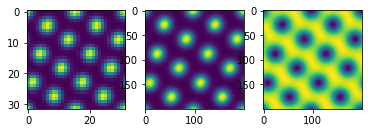

In [9]:
# Direct solution
plt.subplot(131)
plt.imshow(c[0, :,:,-1])
# Interpolated solutions
plt.subplot(132)
plt.imshow(c_interp[0, :,:,-1])
plt.subplot(133)
plt.imshow(c_interp[1, :,:,-1])
plt.show()

### Making an animation

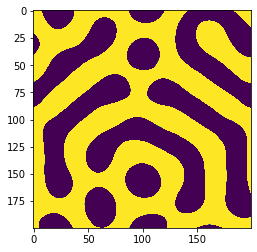

In [10]:
from matplotlib.animation import FuncAnimation

fig = plt.figure()

im = im=plt.imshow(c_interp[0, :,:,0])#  ,interpolation='none')
def init():
    im.set_data(c_interp[0, :,:,0])
    return [im]
    
def animate(i):    
    a=im.get_array()
    a=c_interp[0, :,:,i] 
    im.set_array(c_interp[0, :,:,i] )
    return [im]

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(t), interval=50, blit=True)


anim.save('turring.gif', writer='imagemagick')

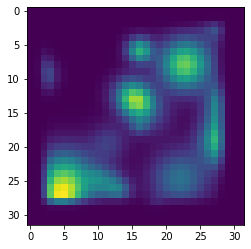

In [28]:
plt.imshow(c[0, :,:,0])
plt.show()

In [19]:
8000/(32*256)

0.9765625